In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# Add project code
import sys
sys.path.append('/eai/project/')

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from collections import namedtuple
from fuel.datasets.hdf5 import H5PYDataset


BATH_SIZE = 100
IMG_SIZE = 256

# Img resizing stuff
LR_HR_RATIO = 4
BIG_SIZE = int(IMG_SIZE * 76 / 64)
SMALL_SIZE = int(BIG_SIZE / LR_HR_RATIO)

DATA_TEMPLATE =             '/fashion/ssense_%i_%i_train.h5'
LANGUAGE_MODEL_FILE =       '/data/glove/glove.6B.300d.txt'
LANGUAGE_MODEL_VOCABULARY = '/data/glove/glove.6B.vocab'

ROOT =                      '/data/fashion/texts/'
TRAIN_DIR =                 'ssense_256_256_train'
TRAIN_TEXT_DATA =           os.path.join(ROOT, TRAIN_DIR, 'classes_and_texts.txt')
TRAIN_CLASSES =             os.path.join(ROOT, TRAIN_DIR, 'categories.json')
TRAIN_TOKENS =              os.path.join(ROOT, TRAIN_DIR, 'tokens.json')

TEST_DIR =                  'ssense_256_256_test'
TEST_TEXT_DATA =            os.path.join(ROOT, TEST_DIR, 'classes_and_texts.txt')
TEST_CLASSES =              os.path.join(ROOT, TEST_DIR, 'categories.json')
TEST_TOKENS =               os.path.join(ROOT, TEST_DIR, 'tokens.json')

In [3]:
data_set = H5PYDataset(DATA_TEMPLATE % (IMG_SIZE, IMG_SIZE), which_sets=('all',))

# Sample data

In [4]:
from embedding.preprocessing import normalize

In [69]:
list_keys(data_set)

[u'category', u'description', u'image']

In [5]:
def list_keys(data_set): 
    return [k.split('_')[1] for k in sorted(data_set.axis_labels.keys())]

Item = namedtuple('Item', ' '.join(list_keys(data_set)))

In [6]:
import scipy.misc
import random

def clean_plot(img):
    plt.imshow(img); plt.xticks([]); plt.yticks([]); plt.show()
    
def clean_plot_dpi(img, size, dpi=60):
    plt.figure().set_size_inches(float(size)/float(dpi),float(size)/float(dpi))
    plt.xticks([]); plt.yticks([]);
    plt.imshow(img);

In [40]:
i = random.randint(0, data_set.num_examples)
handle = data_set.open()
item = Item._make(data_set.get_data(handle, slice(i, min((i+1), data_set.num_examples))))
data_set.close(handle)

Raw text: 
Tapered wool gabardine trousers in olive green. Elasticized rib knit waistband in tones of green. Adjustable cinch strap at waist with d-ring fastening. Five-pocket styling. Zippered vents at cuffs featuring elasticized rib knit cuffs. Silver-tone hardware. Zip-fly. Tonal stitching.

Normalized text: 
tapered wool gabardine trousers in olive green elasticized rib knit waistband in tones of green adjustable cinch strap at waist with d ring fastening five pocket styling zippered vents at cuffs featuring elasticized rib knit cuffs silver tone hardware zip fly tonal stitching

Normalized text: 
tapered wool gabardine trousers in olive green elasticized rib knit waistband in tones of green



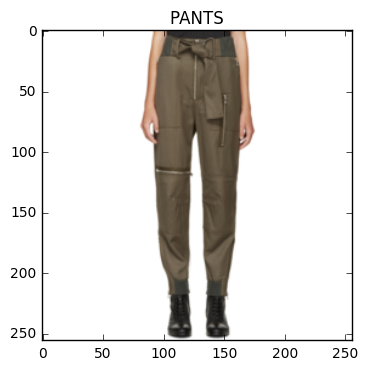

In [41]:
plt.title("%s" % (item.category[0][0]))
plt.imshow(item.image[0]);
print("Raw text: \n%s\n" % item.description[0][0])
print("Normalized text: \n%s\n" %  ' '.join(
    normalize(item.description[0][0], tokenize=True)))
print("Normalized text: \n%s\n" %  ' '.join(
    normalize(item.description[0][0], tokenize=True, head=2)))
plt.show()

## To be consistent with StackGAN

In [14]:
img = item.image[0]
img_76 = scipy.misc.imresize(img, [SMALL_SIZE, SMALL_SIZE], 'bicubic')
img_304 = scipy.misc.imresize(img, [BIG_SIZE, BIG_SIZE], 'bicubic')

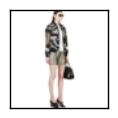

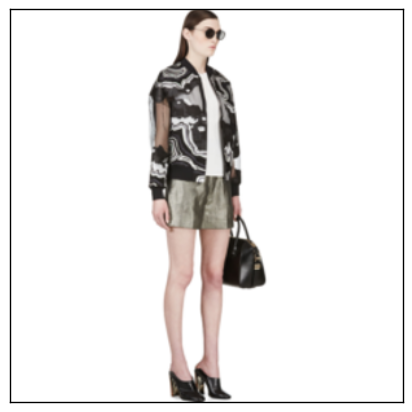

In [15]:
clean_plot_dpi(img_76, SMALL_SIZE); clean_plot_dpi(img_304, BIG_SIZE);

## Load data

In [16]:
from collections import Counter

In [17]:
with open(TRAIN_TEXT_DATA, 'rt') as f:
    train_classes, train_texts = zip(*[line.split(" ", 1) for line in f.readlines()])
    
with open(TEST_TEXT_DATA, 'rt') as f:
    test_classes, test_texts = zip(*[line.split(" ", 1) for line in f.readlines()])

In [61]:
c = Counter([len(t.split(' ')) for t in train_texts])

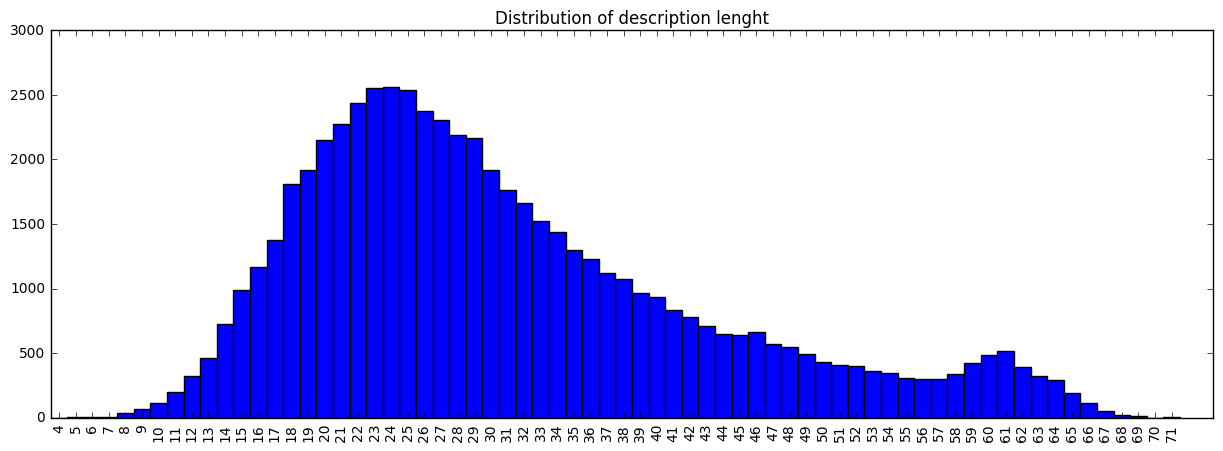

In [62]:
labels, values = zip(*c.items())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(15, 5))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.title('Distribution of description lenght')
plt.show()

## Classes

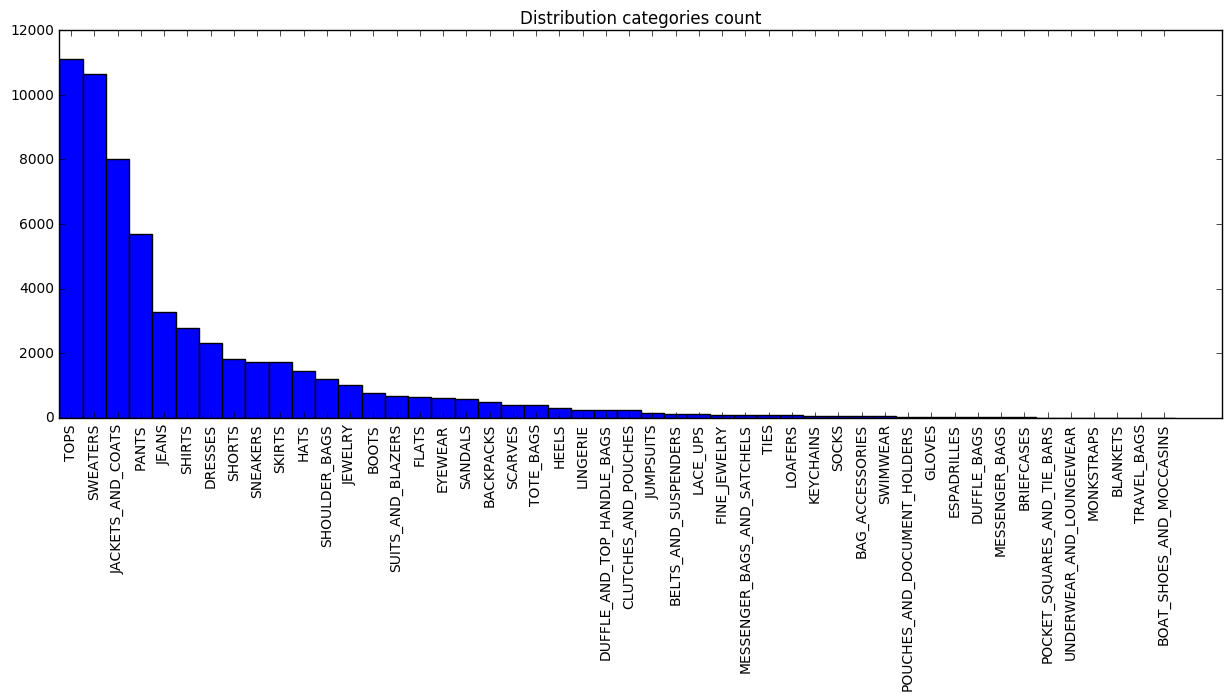

In [63]:
class_counts = Counter(train_classes)
labels, values = zip(*class_counts.most_common())

indexes = np.arange(len(labels))
width = 1

plt.figure(figsize=(15, 5))
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels, rotation=90)
plt.title('Distribution categories count')
plt.show()

In [64]:
from embedding.utils import plot_splits

In [65]:
len(set(test_classes)), len(set(train_classes))

(46, 48)

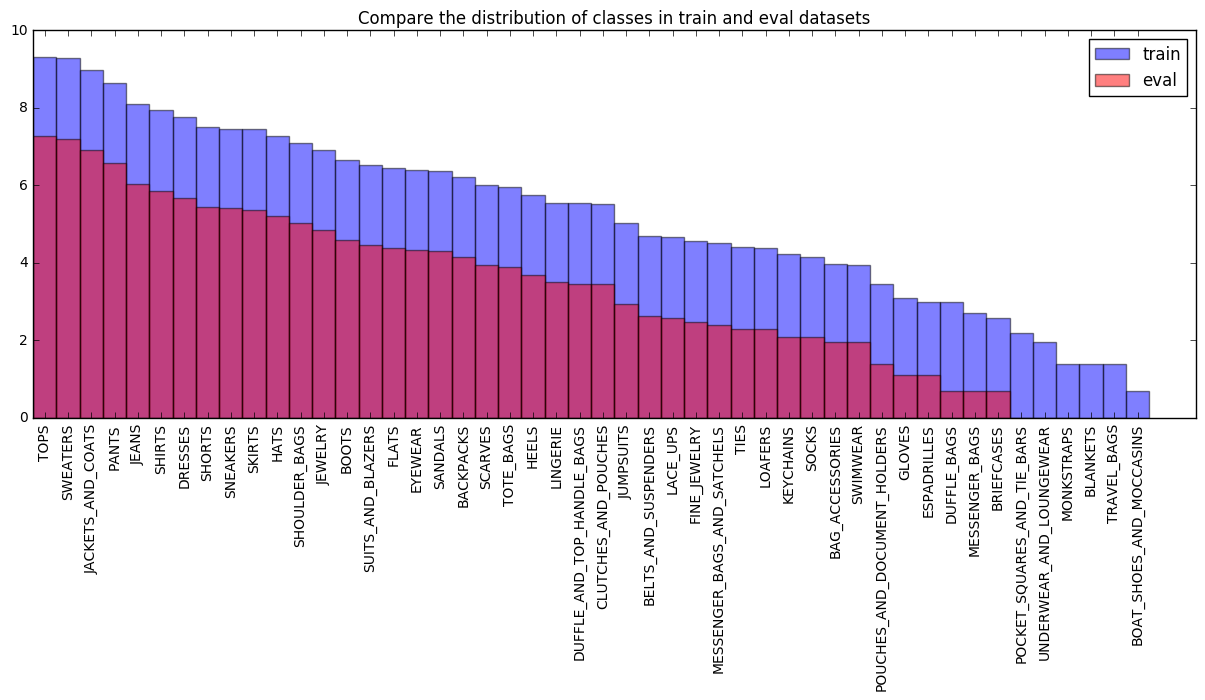

In [66]:
plot_splits(train_classes,test_classes)